In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
df = pd.read_csv('fcc-forum-pageviews.csv', header=0, index_col=0)


In [6]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [7]:
df['clean']= 0

In [16]:
df.loc[ df['value'] <= df['value'].quantile(0.025) , 'clean' ] = 1 

In [17]:
df.loc[ df['value'] >= df['value'].quantile(0.975) , 'clean' ] = 1 

In [20]:
df.loc[df['clean']==1]

,value,clean
date,,
2016-05-09,1201,1
2016-05-10,2329,1
2016-05-11,1716,1
2016-05-12,10539,1
2016-05-13,6933,1
...,...,...
2019-11-25,219608,1
2019-11-26,220590,1
2019-11-27,208223,1


In [21]:
df.loc[df['clean']==0]

,value,clean
date,,
2016-05-19,19736,0
2016-05-26,18060,0
2016-05-27,19997,0
2016-05-28,19044,0
2016-05-29,20325,0
...,...,...
2019-11-24,138875,0
2019-11-29,171584,0
2019-11-30,141161,0


In [24]:
df=df.loc[ df['clean'] == 0 ]

In [25]:
df

,value,clean
date,,
2016-05-19,19736,0
2016-05-26,18060,0
2016-05-27,19997,0
2016-05-28,19044,0
2016-05-29,20325,0
...,...,...
2019-11-24,138875,0
2019-11-29,171584,0
2019-11-30,141161,0


<AxesSubplot:xlabel='date'>

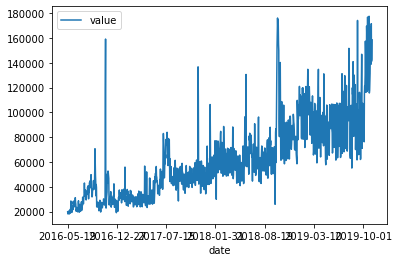

In [31]:
df.reset_index().plot(x='date', y='value')

In [45]:
df=df.drop(['date1'], axis = 1)

In [46]:
df

,value,clean,date
date,,,
2016-05-19,19736,0,2016-05-19
2016-05-26,18060,0,2016-05-26
2016-05-27,19997,0,2016-05-27
2016-05-28,19044,0,2016-05-28
2016-05-29,20325,0,2016-05-29
...,...,...,...
2019-11-24,138875,0,2019-11-24
2019-11-29,171584,0,2019-11-29
2019-11-30,141161,0,2019-11-30


In [50]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year

In [51]:
df

,value,clean,date,month,year
date,,,,,
2016-05-19,19736,0,2016-05-19,5,2016
2016-05-26,18060,0,2016-05-26,5,2016
2016-05-27,19997,0,2016-05-27,5,2016
2016-05-28,19044,0,2016-05-28,5,2016
2016-05-29,20325,0,2016-05-29,5,2016
...,...,...,...,...,...
2019-11-24,138875,0,2019-11-24,11,2019
2019-11-29,171584,0,2019-11-29,11,2019
2019-11-30,141161,0,2019-11-30,11,2019


In [52]:
df['PageViewPerMonth'] = df.groupby('month','year').sum()

ValueError: No axis named year for object type DataFrame

In [69]:
df2 = df.groupby(['year','month'])['value'].sum()

In [80]:
df3 = pd.DataFrame(df2)

In [81]:
type(df3)

pandas.core.frame.DataFrame

In [87]:
df3

value
year month         
2016 5        97162
     6       415627
     7       675071
     8       962525
     9      1244306
     10      849348
     11     1213459
     12      862805
2017 1      1016340
     2       871166
     3       910442
     4       926362
     5      1061573
     6      1307325
     7      2040012
     8      1479086
     9      1421304
     10     1470600
     11     1731047
     12     1501038
2018 1      1815983
     2      1839012
     3      1943507
     4      1870525
     5      1753449
     6      2103510
     7      1971323
     8      1947780
     9      1978252
     10     3118588
     11     2360650
     12     2481472
2019 1      3163752
     2      2967114
     3      2827649
     4      2681053
     5      2834637
     6      2532198
     7      2917097
     8      2978802
     9      2918065
     10     2701650
     11     2004330
     12      301467

<AxesSubplot:xlabel='month'>

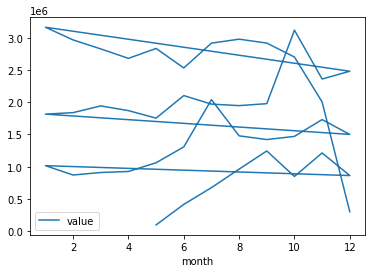

In [88]:
df3.reset_index().plot(x='month', y='value')

Text(0, 0.5, 'Avg Views')

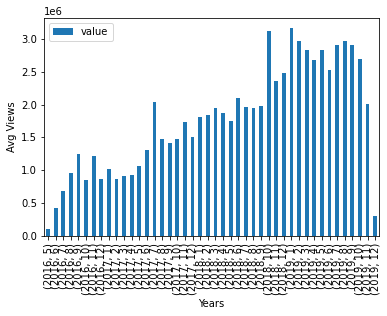

In [93]:
df3.plot(kind="bar")
plt.xlabel("Years")
plt.ylabel("Avg Views")